<img src="https://shwetkm.github.io/upxlogo.png"></img>


# Case study 3: Logistic regression model to predict credit card default

## Business Objective 


The dataset consists of 10000 individuals and whether their credit card has defaulted or not. 

**Objective :**  

Predict whether the individual will default in their credit card payment.

Below are the column description:
- **default** : Whether the individual has defaulted
- **student** : Whether the individual is student
- **balance** : The average balance that the customer has remaining on their credit card after making their monthly payment
- **income** : Income of individual



## Load Dataset

In [1]:
pwd

'E:\\todo\\UPX\\Machine Learning\\Logistic Regerssion'

## Import Packages

In [2]:
#Import basic packages

import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd               
import numpy as np
import pickle

from sklearn.model_selection import train_test_split   #splitting data
from pylab import rcParams
from sklearn.linear_model import LinearRegression         #linear regression
from sklearn.metrics.regression import mean_squared_error #error metrics
from sklearn.metrics import mean_absolute_error

import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

%matplotlib inline     
sns.set(color_codes=True)




In [3]:
# Code for displaying plotly express plots inline in colab
#def configure_plotly_browser_state():
#  import IPython
#  display(IPython.core.display.HTML('''
#        <script src="/static/components/requirejs/require.js"></script>
##        <script>
#          requirejs.config({
#            paths: {
 #             base: '/static/base',
  #            plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
   #         },
    #      });
     #   </script>
#        '''))
  
#import plotly_express as px

## Read Data



### 1. Through Pandas

In [4]:
# Read data through Pandas and compute time taken to read
t_start = time.time()
df_credit = pd.read_csv(r"E:\todo\UPX\Machine Learning\Logistic Regerssion\csv\credit_carddata.csv")
t_end = time.time()
print('pd.read_csv(): {} s'.format(t_end-t_start)) # time [s]
df_credit.head()

pd.read_csv(): 0.02599167823791504 s


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### 2. Through Dask

In [5]:
import dask.dataframe as dd

In [6]:
# Read data through Dask and compute time taken to read
#import dask.dataframe as dd
#t_start = time.time()
#df_dask = dd.read_csv(r"E:\todo\UPX\Machine Learning\Logistic Regerssion\csv\credit_carddata.csv")
#t_end = time.time()
#print('dd.read_csv(): {} s'.format(t_end-t_start)) # time [s]
#df_dask.tail()

**Observation**: Dask is almost 10 times faster than Pandas when reading files.

### 3. Subsample into n rows

In [7]:
# Sample n rows
df_credit = df_credit.sample(df_credit.shape[0])
print(df_credit.shape)
df_credit

(10000, 4)


,default,student,balance,income
8986,No,No,1274.796550,18044.823122
2251,No,No,0.000000,40056.692657
9988,No,No,0.000000,41740.686597
2708,No,Yes,213.173275,22811.456978
7397,No,Yes,1154.446367,14301.157118
...,...,...,...,...
4530,No,No,819.530734,38456.615038
4577,No,No,1137.791157,21103.429621
628,No,No,107.277527,42287.302862
171,No,No,836.300072,54607.178740


## Exploratory Data Analysis

### Let's look into summary statistics

In [8]:
#Let's look into the total number of columns and observations in the dataset
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8986 to 8665
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [9]:
#Let's look into summary statistics of data
df_credit.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


### Data Cleaning

#### Pandas profiling

In [10]:
#Perform Pandas profiling to understand quick overview of columns
#import pandas_profiling
#report = pandas_profiling.ProfileReport(df_credit)
#covert profile report as html file
#report.to_file("credit_data.html")
print("This code is not executed as profile creation is resource intensive and done Once")

This code is not executed as profile creation is resource intensive and done Once


In [11]:
#from IPython.display import display,HTML,IFrame
#display(HTML(open('credit_data.html').read()))
print("")

**Observation:**
- From Pandas profiling we understand there are no null values in any of the columns.

In [12]:
# count the number of NaN values in each column
df_credit.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [13]:
#The datatypes have now been changed
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8986 to 8665
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


### Data Visualization

#### Let's analyze the distribution of balance when a customer defaults or does not default

In [14]:
df_credit

,default,student,balance,income
8986,No,No,1274.796550,18044.823122
2251,No,No,0.000000,40056.692657
9988,No,No,0.000000,41740.686597
2708,No,Yes,213.173275,22811.456978
7397,No,Yes,1154.446367,14301.157118
...,...,...,...,...
4530,No,No,819.530734,38456.615038
4577,No,No,1137.791157,21103.429621
628,No,No,107.277527,42287.302862
171,No,No,836.300072,54607.178740


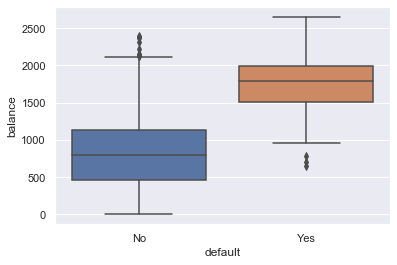

In [15]:
# Relation between balance and default
%matplotlib inline
sns.boxplot(x='default', y='balance', data=df_credit)
plt.show()

**Observation:** People who have more balance have defaulted more in their credit card payments.

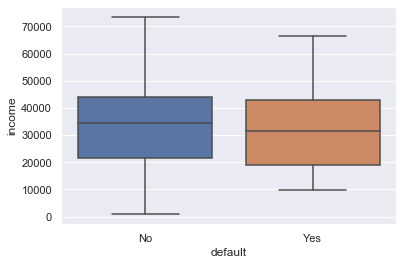

In [16]:
# Relation between income and default

sns.boxplot(x='default', y='income', data=df_credit)
plt.show()

**Observation:** There is not much relation between income and whether they have defaulted in their credit card payments.

#### Relation between balance and income and whether they have defaulted or not 

In [21]:
#configure_plotly_browser_state()
#px.scatter(df_credit, x="income", y="balance" ,color="default",
 #          hover_data=["student"], log_x=True, size_max=60)

**Observation**:People who have more balance have more defaults.

In [22]:
# Relation between Student and default

pd.crosstab(df_credit['default'], df_credit['student'], rownames=['Default'], colnames=['Student'])

Student,No,Yes
Default,,
No,6850,2817
Yes,206,127


#### Correlation between selected variables

The heat map produces a correlation plot between variables of the dataframe.

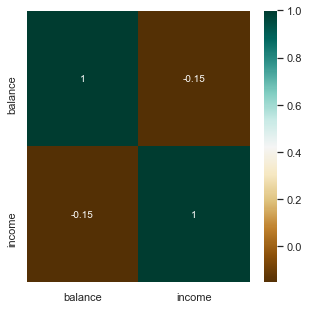

In [23]:
plt.figure(figsize=(5,5))
c = df_credit.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

**Observation**: The heat map illustrates that income and balance are negatively correlated.

#### Explore how often a student defaults

In [26]:
#configure_plotly_browser_state()
#px.box(df_credit, x="default", y="income", color="student",hover_data=['balance'],notched=True)

**Observation:** 

- Student defaulters are lesser as compared to others

## Model Building

###  Prepare the Data for model building

#### Perform one-hot encoding for categorical variables

In [27]:
#Select the variables to be one-hot encoded
one_hot_features = ['student', 'default']
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(df_credit[one_hot_features],drop_first=True)
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)
print(one_hot_encoded)
# Convert Categorical to Numerical for default column


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8986 to 8665
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_Yes  10000 non-null  uint8
 1   default_Yes  10000 non-null  uint8
dtypes: uint8(2)
memory usage: 417.7 KB
      student_Yes  default_Yes
8986            0            0
2251            0            0
9988            0            0
2708            1            0
7397            1            0
...           ...          ...
4530            0            0
4577            0            0
628             0            0
171             0            0
8665            1            0

[10000 rows x 2 columns]


In [28]:
one_hot_encoded

,student_Yes,default_Yes
8986,0,0
2251,0,0
9988,0,0
2708,1,0
7397,1,0
...,...,...
4530,0,0
4577,0,0
628,0,0
171,0,0


In [29]:
# Replacing categorical columns with dummies
fdf = df_credit.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)
fdf.head()

,balance,income,student_Yes,default_Yes
8986,1274.796550,18044.823122,0,0
2251,0.000000,40056.692657,0,0
9988,0.000000,41740.686597,0,0
2708,213.173275,22811.456978,1,0
7397,1154.446367,14301.157118,1,0


In [30]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 8986 to 8665
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balance      10000 non-null  float64
 1   income       10000 non-null  float64
 2   student_Yes  10000 non-null  uint8  
 3   default_Yes  10000 non-null  uint8  
dtypes: float64(2), uint8(2)
memory usage: 573.9 KB


#### Standardization

In [31]:
fdf.columns

Index(['balance', 'income', 'student_Yes', 'default_Yes'], dtype='object')

In [32]:
#Standardize rows into uniform scale

X = fdf.drop(['income', 'student_Yes', 'default_Yes'],axis=1)
y = fdf['default_Yes']
X_stud=fdf['student_Yes']


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Scale and center the data
fdf_normalized = scaler.transform(X)

# Create a pandas DataFrame
fdf_normalized = pd.DataFrame(data=fdf_normalized, index=X.index, columns=X.columns)

print(fdf_normalized)

fdf_normalized=pd.concat([fdf_normalized,X_stud],axis=1)


       balance
8986  0.908476
2251 -1.727085
9988 -1.727085
2708 -1.286362
7397  0.659660
...        ...
4530 -0.032757
4577  0.625226
628  -1.505295
171   0.001913
8665 -0.800370

[10000 rows x 1 columns]


In [33]:
fdf_normalized.head()

,balance,student_Yes
8986,0.908476,0
2251,-1.727085,0
9988,-1.727085,0
2708,-1.286362,1
7397,0.659660,1


#### Split the data into train and test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(fdf_normalized,y,random_state=1234,test_size=0.3)

### Train the model

In [35]:
# Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()                            # Set Large C value for low regularization to prevent overfitting
logreg.fit(X_train, y_train)

print(logreg.coef_)                                            # Coefficients for Logistic Regression
print(logreg.intercept_)

[[ 2.63696466 -0.67822408]]
[-5.77242108]


### Test the model

In [36]:
# now applying our learnt model on test and also on train data
y_pred_test_prob=logreg.predict(X_test)
y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

In [37]:
y_pred_test>0

array([False, False, False, ..., False, False, False])

In [38]:
y_pred_test_prob>0

array([False, False, False, ..., False, False, False])

### Metrics of the model

#### Accuracy of the model

In [39]:
from sklearn import metrics
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.9723333333333334


In [40]:
# comparing the metrics of predicted lebel and real label of test data
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Train Accuracy:  0.9737142857142858


#### Null Accuracy

In [41]:
# Actual Values of y_test
y_test.value_counts()
y_test.value_counts().head(1) / len(y_test)

0    0.963
Name: default_Yes, dtype: float64

**The null accuracy is 96.67%. There is only a slight improvement in accuracy for our model from the baseline model.**

Accuracy is not an appropriate metric in this scenario. We employ confusion matrix and ROC curve to further understand performance of our model on test data.

#### Confusion Matrix

In [42]:
conf=metrics.confusion_matrix(y_test, y_pred_test)
print(conf)

[[2880    9]
 [  74   37]]


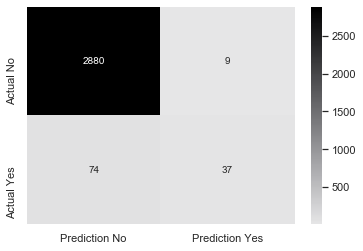

In [44]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')


**Observation**: Unfortunately, the model has not predicted any of the defaulters correctly.  

In [46]:
# Creating Classification Report
conf=metrics.confusion_matrix(y_test, y_pred_test)
print(conf)
cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

[[2880    9]
 [  74   37]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2889
           1       0.80      0.33      0.47       111

    accuracy                           0.97      3000
   macro avg       0.89      0.67      0.73      3000
weighted avg       0.97      0.97      0.97      3000



#### Imbalanced Data

The above metrics illustrate there is a clear imbalance in data.

Let us retrain our data using logistic regression this time using a parameter called 'balanced' which would handle imbalance in the data by changing the threshold set by logistic regression model:

In [ ]:
# Building the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e42,class_weight='balanced')                            # Set Large C value for low regularization to prevent overfitting
logreg.fit(X_train, y_train)

print(logreg.coef_)                                            # Coefficients for Logistic Regression
print(logreg.intercept_)

In [ ]:
# now applying our learnt model on test and also on train data

y_pred_test = logreg.predict(X_test)
y_pred_train = logreg.predict(X_train)

In [ ]:
from sklearn import metrics
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

In [ ]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [ ]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)
cr = metrics.classification_report(y_test, y_pred)

#### ROC Curve

In [ ]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

In [ ]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for credit default')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

## Model Explainability

### LIME

In [ ]:
# Import lime package
import lime
import lime.lime_tabular

#Find caegorical features
categorical_features = np.argwhere(np.array([len(set(X_test.values[:,x])) for x in range(X_test.values.shape[1])]) <= 10).flatten()
#Lime explainer for regression
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values,
feature_names=X_test.columns.values.tolist(),
class_names=['default'],
categorical_features=categorical_features,
verbose=True, mode='regression')
ind = 4
#Fit on test data
exp = explainer.explain_instance(X_test.values[ind], logreg.predict, num_features=3)
#Show in notebook features influencing predictions
exp.show_in_notebook(show_table=True)

### ELI5

In [ ]:
# Import Eli5 package
import eli5
from eli5.sklearn import PermutationImportance

# Find the importance of columns for prediction
perm = PermutationImportance(logreg, random_state=1).fit(X_test,y_pred_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
#Understanding how each feature influences the prediction
eli5.show_prediction(model_fit, doc=X_test.iloc[[ind]], feature_names=list(X_test.columns))

### SHAP

In [ ]:
#Import SHAP package
import shap

#Create explainer for linear model
explainer = shap.LinearExplainer(logreg,data=X_test.values)
shap_values = explainer.shap_values(X_test)

In [ ]:
#Understanding how each feature influences the prediction

shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test.iloc[ind,:],
    feature_names=X_test.columns.tolist()
)

In [ ]:

shap.summary_plot(shap_values,X_test)


In [ ]:
shap.dependence_plot("balance", shap_values, X_test)